In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#création des données
n = 6
villes =[i for i in range(n)]
arcs = [(i,j) for i in range(n) for j in range(n) if i!=j]


In [3]:
#création de coordonées
np.random.seed(0)
x = np.random.rand(n)*100
y = np.random.rand(n)*100

In [4]:
#création de matrice de distance
distance={(i,j):np.hypot(x[i]-x[j],y[i]-y[j])for i,j in arcs}

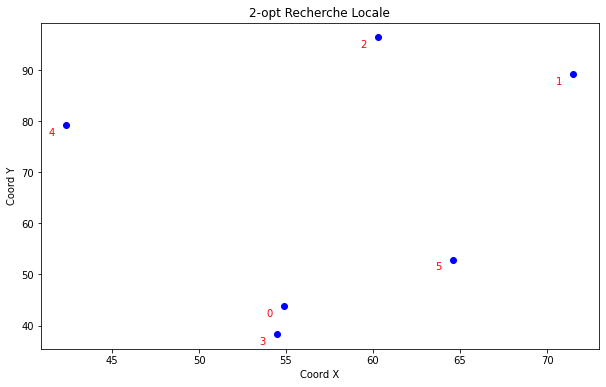

In [5]:
#graphiques des données
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue')

#écrire le nom des villes nœuds

for n in range(len(x)):
  plt.annotate(str(n),xy=(x[n],y[n]),xytext =(x[n]-1,y[n]-2),color='red')

plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.title("2-opt Recherche Locale")


plt.show()

In [6]:
#Fonction de plus proches voisins
def Nearest_Neighbor(starting_node,villes,distance):
  NN=[starting_node]
  n=len(villes)

  while len(NN)<n:
    k=NN[-1]
    nn={(k,j):distance[(k,j)] for j in villes if j!=k and j not in NN}
    nn.items()
    new=min(nn.items(),key = lambda x:x[1])
    NN.append(new[0][1])
  NN.append(starting_node)

  return NN

In [7]:
def total_distance(liste,distance):
  dist=0
  for n in range(len(liste)-1):
    i=liste[n]
    j=liste[n+1]
    dist= dist+distance[(i,j)]
  return dist
  

 **2-Opt**

In [8]:
# création de la solution initiale avec NN
starting_node =3
NN =Nearest_Neighbor(starting_node,villes,distance)
NN

[3, 0, 5, 4, 2, 1, 3]

In [9]:
# distance de la solution NN
d=total_distance(NN,distance)
d

144.95824312990248

In [10]:
# lis le NN
NN[3]

4

In [11]:
#Coordonnes x d'un élément de NN
x[NN[2]]

64.58941130666561

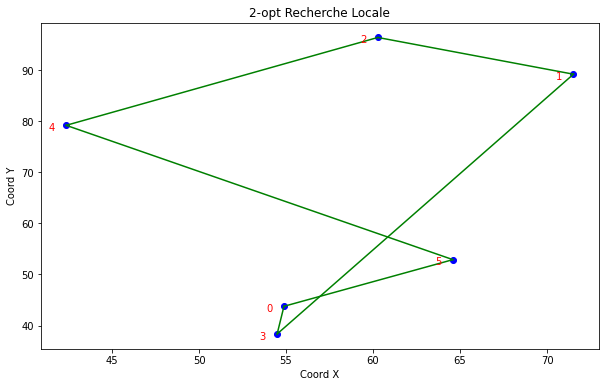

In [12]:
# graphique de la solution et des données
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue')

#écrire le nom des villes nœuds

for n in range(len(x)):
  plt.annotate(str(n),xy=(x[n],y[n]),xytext =(x[n]-1,y[n]-1),color='red')

#graphique de solution
for n in range(len(NN)-1):
  plt.plot([x[NN[n]],x[NN[n+1]]],[y[NN[n]],y[NN[n+1]]],color='green')


plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.title("2-opt Recherche Locale")

plt.show()


In [13]:
#implémentation de la fonction 2-opt
def LS_2opt(NN,distance):
    min_change =0
    for i in range(len(NN)-2):
        for j in range (i+2,len(NN)-1):
            cout_actuel= distance[(NN[i],NN[i+1])]+distance[(NN[j],NN[j+1])]
            cout_nouveau= distance[(NN[i],NN[j])]+distance[(NN[i+1],NN[j+1])]
            change=cout_nouveau-cout_actuel
            
            if change<min_change:
                min_change = change
                min_i =i
                min_j =j
    if min_change < 0:
        NN[min_i+1:min_j+1] = NN[min_i+1:min_j+1][::-1]
    
    return NN
 

In [14]:
#exécuter 
heure_debut = time.time()



changement = 1
count = 0
sol =NN.copy()
while changement!=0:

    count = count +1
    
    initial = total_distance(sol,distance)
    
    sol = LS_2opt(sol,distance).copy()
    final =total_distance(sol,distance)

    changement =np.abs(final-initial)

heure_fin=time.time()

print("Solution 2 opt:",sol)
print("Distance totale:",total_distance(sol,distance))
print("temps:",heure_debut-heure_fin)
print("nb d'itérations:",count)


Solution 2 opt: [3, 0, 4, 2, 1, 5, 3]
Distance totale: 135.8139138286956
temps: -0.00045561790466308594
nb d'itérations: 3


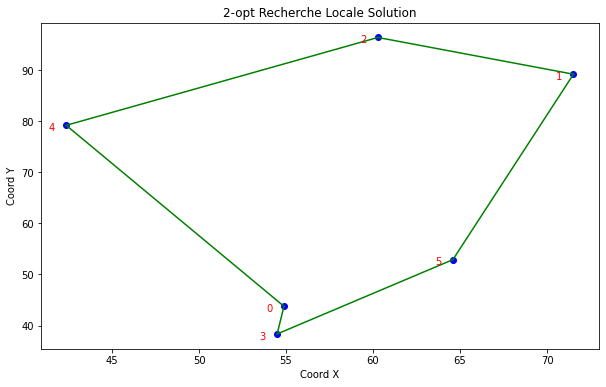

In [15]:
#Visualiser la solution

plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue')

#écrire le nom des villes nœuds

for n in range(len(x)):
  plt.annotate(str(n),xy=(x[n],y[n]),xytext =(x[n]-1,y[n]-1),color='red')

#graphique de solution
for n in range(len(sol)-1):
  plt.plot([x[sol[n]],x[sol[n+1]]],[y[sol[n]],y[sol[n+1]]],color='green')


plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.title("2-opt Recherche Locale Solution")

plt.show()

